In [3]:
print(r'https://juanitorduz.github.io/germany_plots/')

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

https://juanitorduz.github.io/germany_plots/


In [4]:
plz_shape_df = gpd.read_file('plz-gebiete.shp', dtype={'plz': str}) 

plz_region_landkreis_df = pd.read_csv(
    'zuordnung_plz_ort_landkreis.csv', 
    sep=',', 
    dtype={'plz': str}
)
plz_region_landkreis_df.drop('osm_id', axis=1, inplace=True)
plz_region_landkreis_df.drop('ags', axis=1, inplace=True)

# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_landkreis_df, 
    on='plz',
    how='inner'
)

germany_df.head()

,plz,note,geometry,ort,landkreis,bundesland
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Gangelt,Kreis Heinsberg,Nordrhein-Westfalen
1,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Selfkant,Kreis Heinsberg,Nordrhein-Westfalen
2,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",Kranenburg,Kreis Kleve,Nordrhein-Westfalen
3,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Heinsberg,Kreis Heinsberg,Nordrhein-Westfalen
4,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Waldfeucht,Kreis Heinsberg,Nordrhein-Westfalen


In [5]:
#https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74
#Importiert Daten
path = 'RKI_COVID19_2021_01_05.csv'
data = pd.read_csv(path)

data['Meldedatum']= pd.to_datetime(data['Meldedatum'])
data['Refdatum']= pd.to_datetime(data['Refdatum'])
akt_date=pd.to_datetime(data["Datenstand"][0],format="%d.%m.%Y, %M:%H Uhr")

data.head()

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Kiel,A35-A59,M,1,0,2020-10-31,1002,"05.01.2021, 00:00 Uhr",0,-9,2020-10-25,0,1,1,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Kiel,A35-A59,M,2,0,2020-10-31,1002,"05.01.2021, 00:00 Uhr",0,-9,2020-10-26,0,2,1,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Kiel,A35-A59,M,1,0,2020-10-31,1002,"05.01.2021, 00:00 Uhr",0,-9,2020-10-27,0,1,1,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Kiel,A35-A59,M,1,0,2020-11-01,1002,"05.01.2021, 00:00 Uhr",0,-9,2020-11-01,0,1,0,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Kiel,A35-A59,M,1,0,2020-11-02,1002,"05.01.2021, 00:00 Uhr",0,-9,2020-10-26,0,1,1,Nicht übermittelt


In [6]:
def datum(df,date,tage,melde=True,return_date=False):
    #returnd Fälle von Datum(inkl) bis Datum-Tage(inkl)
    #bsp: datum(df=data_wup,date="2020/9/25",tage=2)
    end_date=pd.to_datetime(date)-pd.DateOffset(days=1)
    start_date=end_date-pd.DateOffset(days=tage)
    if melde:
        mask = (df['Meldedatum'] > start_date) & (df['Meldedatum'] <  end_date) | (df['Meldedatum'] == end_date)
    else:
        mask = (df['Refdatum'] > start_date) & (df['Refdatum'] <  end_date) | (df['Refdatum'] == end_date)
    if return_date:
        return df.loc[mask],start_date,end_date
    else:
        return df.loc[mask]


data.Bundesland.unique()


array(['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen',
       'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz',
       'Baden-Württemberg', 'Bayern', 'Saarland', 'Berlin', 'Brandenburg',
       'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen'],
      dtype=object)

In [7]:
datum_list=[]
Bundeslaender=data.Bundesland.unique()

Bundeslaender_faelle=[]
for i in range(14):
    date=akt_date-pd.DateOffset(days=i+1)
    datum_list.append(date)
    data_bund_datum=data.loc[data['Meldedatum']==date]
    
    liste_faelle=[]
    for Bundesland in Bundeslaender:        
        data_land_datum=data_bund_datum.loc[data_bund_datum['Bundesland']==Bundesland]
        liste_faelle.append(data_land_datum['AnzahlFall'].sum(axis = 0, skipna = True))
    Bundeslaender_faelle.append(pd.Series(liste_faelle,index=Bundeslaender))
    
datum_list

[Timestamp('2021-01-04 00:00:00'),
 Timestamp('2021-01-03 00:00:00'),
 Timestamp('2021-01-02 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2020-12-31 00:00:00'),
 Timestamp('2020-12-30 00:00:00'),
 Timestamp('2020-12-29 00:00:00'),
 Timestamp('2020-12-28 00:00:00'),
 Timestamp('2020-12-27 00:00:00'),
 Timestamp('2020-12-26 00:00:00'),
 Timestamp('2020-12-25 00:00:00'),
 Timestamp('2020-12-24 00:00:00'),
 Timestamp('2020-12-23 00:00:00'),
 Timestamp('2020-12-22 00:00:00')]

In [8]:
germany_df['fall']=np.array([Bundeslaender_faelle[0][x] for x in np.array(germany_df["bundesland"])])
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}


In [ ]:
def 

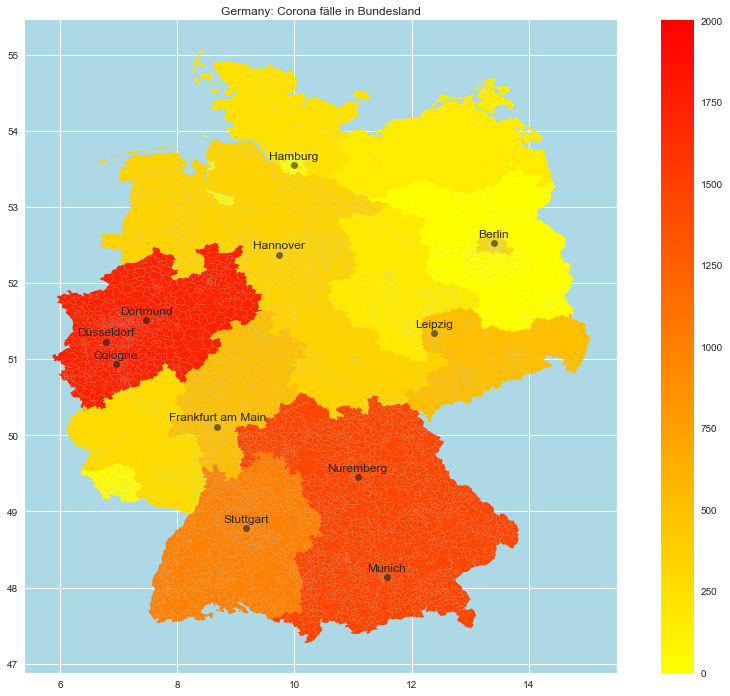

In [10]:
fig, ax = plt.subplots(figsize=(16,12))
vmin, vmax = 0, 2000

germany_df.plot(
    ax=ax, 
    column='fall', 
    categorical=False, 
    legend=True,
    vmin=vmin, vmax=vmax,
    cmap='autumn_r',
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
)
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Coronafälle am Tag im Bundesland', 
    aspect=1.3, 
    facecolor='lightblue'
);